## Example of python program converting a raw CSV file to a DataFrame and then exporting to a PostgresSQL table

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sqlalchemy import create_engine
import psycopg2 
import psycopg2.extras
import io
import getpass

In [3]:
try:
    p = getpass.getpass()
except Exception as error:
    print('ERROR', error)

········


In [4]:
engine = create_engine('postgresql://postgres:' + p + '@localhost:5432/WTA')

# Example python program to read data from a PostgreSQL table and load into a pandas DataFrame

In [5]:
# Connect to PostgreSQL server
dbConnection = engine.connect()

In [6]:
# Read data from PostgreSQL database table and load into a DataFrame instance
dataFrame = pd.read_sql("select * from \"matches\"", dbConnection)

In [7]:
# Print the DataFrame
dataFrame.head()

,index,tourney_date,tourney_name,tourney_level,surface,rounds,best_of,winner_id,winner_name,winner_rank,loser_id,loser_name,loser_rank
0,0,20100206,Fed Cup WG R1: UKR vs ITA,D,Hard,RR,3,201416,Alona Bondarenko,26.0,201212,Francesca Schiavone,18.0
1,1,20100206,Fed Cup WG R1: UKR vs ITA,D,Hard,RR,3,201355,Flavia Pennetta,12.0,201435,Kateryna Bondarenko,33.0
2,2,20100206,Fed Cup WG R1: UKR vs ITA,D,Hard,RR,3,201355,Flavia Pennetta,12.0,201416,Alona Bondarenko,26.0
3,3,20100206,Fed Cup WG R1: UKR vs ITA,D,Hard,RR,3,201212,Francesca Schiavone,18.0,201435,Kateryna Bondarenko,33.0
4,4,20100206,Fed Cup WG R1: CZE vs GER,D,Hard,RR,3,201394,Anna Lena Groenefeld,66.0,201425,Lucie Safarova,46.0


In [8]:
# Close the database connection
dbConnection.close();

## Example of pre-processing data before plugging it on a Machine Learning model

In [9]:
dataFrame.shape

(29252, 13)

In [10]:
dataFrame.dtypes

index              int64
tourney_date       int64
tourney_name      object
tourney_level     object
surface           object
rounds            object
best_of            int64
winner_id          int64
winner_name       object
winner_rank      float64
loser_id           int64
loser_name        object
loser_rank       float64
dtype: object

In [11]:
# Converting tourney_date to datetime format
dataFrame['tourney_date'] = pd.to_datetime(dataFrame['tourney_date']) 
# Restricing dates
# df_atp = df_atp.loc[(df_atp['Date'] > '2014-11-09') & (df_atp['Date'] <= '2016-11-09')]
# Keeping only completed matches
# df_atp = df_atp[df_atp['Comment'] == 'Completed'].drop("Comment",axis = 1)
# Rename Best of to Best_of
# df_atp.rename(columns = {'Best of':'Best_of'},inplace=True)
# Choosing features
# cols_to_keep = ['tourney_date','Series','surface', 'round','best_of', 'winner_rank','loser_rank']
# Dropping NaN
dataFrame = dataFrame.dropna()
# Dropping errors in the dataset and unimportant entries (e.g. there are very few entries for Masters Cup)
# dataFrame = dataFrame[(dataFrame['loser_rank'] != 'NR') & (dataFrame['winner_rank'] != 'NR') & (dataFrame['Series'] != 'Masters Cup')]
dataFrame.head()

,index,tourney_date,tourney_name,tourney_level,surface,rounds,best_of,winner_id,winner_name,winner_rank,loser_id,loser_name,loser_rank
0,0,1970-01-01 00:00:00.020100206,Fed Cup WG R1: UKR vs ITA,D,Hard,RR,3,201416,Alona Bondarenko,26.0,201212,Francesca Schiavone,18.0
1,1,1970-01-01 00:00:00.020100206,Fed Cup WG R1: UKR vs ITA,D,Hard,RR,3,201355,Flavia Pennetta,12.0,201435,Kateryna Bondarenko,33.0
2,2,1970-01-01 00:00:00.020100206,Fed Cup WG R1: UKR vs ITA,D,Hard,RR,3,201355,Flavia Pennetta,12.0,201416,Alona Bondarenko,26.0
3,3,1970-01-01 00:00:00.020100206,Fed Cup WG R1: UKR vs ITA,D,Hard,RR,3,201212,Francesca Schiavone,18.0,201435,Kateryna Bondarenko,33.0
4,4,1970-01-01 00:00:00.020100206,Fed Cup WG R1: CZE vs GER,D,Hard,RR,3,201394,Anna Lena Groenefeld,66.0,201425,Lucie Safarova,46.0


In [12]:
dataFrame.shape

(28034, 13)

In [13]:
dataFrame.dtypes

index                     int64
tourney_date     datetime64[ns]
tourney_name             object
tourney_level            object
surface                  object
rounds                   object
best_of                   int64
winner_id                 int64
winner_name              object
winner_rank             float64
loser_id                  int64
loser_name               object
loser_rank              float64
dtype: object

In [14]:
# Transform strings into numerical values
dataFrame[['best_of','winner_rank','loser_rank']] = dataFrame[['best_of','winner_rank','loser_rank']].astype(int)
dataFrame.head()

,index,tourney_date,tourney_name,tourney_level,surface,rounds,best_of,winner_id,winner_name,winner_rank,loser_id,loser_name,loser_rank
0,0,1970-01-01 00:00:00.020100206,Fed Cup WG R1: UKR vs ITA,D,Hard,RR,3,201416,Alona Bondarenko,26,201212,Francesca Schiavone,18
1,1,1970-01-01 00:00:00.020100206,Fed Cup WG R1: UKR vs ITA,D,Hard,RR,3,201355,Flavia Pennetta,12,201435,Kateryna Bondarenko,33
2,2,1970-01-01 00:00:00.020100206,Fed Cup WG R1: UKR vs ITA,D,Hard,RR,3,201355,Flavia Pennetta,12,201416,Alona Bondarenko,26
3,3,1970-01-01 00:00:00.020100206,Fed Cup WG R1: UKR vs ITA,D,Hard,RR,3,201212,Francesca Schiavone,18,201435,Kateryna Bondarenko,33
4,4,1970-01-01 00:00:00.020100206,Fed Cup WG R1: CZE vs GER,D,Hard,RR,3,201394,Anna Lena Groenefeld,66,201425,Lucie Safarova,46


In [15]:
dataFrame.dtypes

index                     int64
tourney_date     datetime64[ns]
tourney_name             object
tourney_level            object
surface                  object
rounds                   object
best_of                   int64
winner_id                 int64
winner_name              object
winner_rank               int64
loser_id                  int64
loser_name               object
loser_rank                int64
dtype: object

In [16]:
# Create an extra columns for the variable win described above using an auxiliary function win(x)
def win(x):
    if x > 0:
        return 0
    elif x <= 0:
        return 1  
    
dataFrame['win'] = (dataFrame['winner_rank'] - dataFrame['loser_rank']).apply(win)
dataFrame.head()

,index,tourney_date,tourney_name,tourney_level,surface,rounds,best_of,winner_id,winner_name,winner_rank,loser_id,loser_name,loser_rank,win
0,0,1970-01-01 00:00:00.020100206,Fed Cup WG R1: UKR vs ITA,D,Hard,RR,3,201416,Alona Bondarenko,26,201212,Francesca Schiavone,18,0
1,1,1970-01-01 00:00:00.020100206,Fed Cup WG R1: UKR vs ITA,D,Hard,RR,3,201355,Flavia Pennetta,12,201435,Kateryna Bondarenko,33,1
2,2,1970-01-01 00:00:00.020100206,Fed Cup WG R1: UKR vs ITA,D,Hard,RR,3,201355,Flavia Pennetta,12,201416,Alona Bondarenko,26,1
3,3,1970-01-01 00:00:00.020100206,Fed Cup WG R1: UKR vs ITA,D,Hard,RR,3,201212,Francesca Schiavone,18,201435,Kateryna Bondarenko,33,1
4,4,1970-01-01 00:00:00.020100206,Fed Cup WG R1: CZE vs GER,D,Hard,RR,3,201394,Anna Lena Groenefeld,66,201425,Lucie Safarova,46,0


### Exploratory Analysis for the DataFrame

In [17]:
print(dataFrame['surface'].unique())

['Hard' 'Clay' 'Carpet' 'Grass']


In [18]:
# Look at percentage of wins for each surface. 
win_by_Surface = pd.crosstab(dataFrame.win, dataFrame.surface).apply( lambda x: x/x.sum(), axis = 0 )
win_by_Surface

surface,Carpet,Clay,Grass,Hard
win,,,,
0,0.308725,0.359161,0.360981,0.345233
1,0.691275,0.640839,0.639019,0.654767


In [19]:
print(dataFrame['rounds'].unique())

['RR' 'QF' 'R16' 'SF' 'F' 'R32' 'R64' 'R128' 'BR']


In [20]:
# Look at percentage of wins for each round.
win_by_round = pd.crosstab(dataFrame.win, dataFrame['rounds']).apply( lambda x: x/x.sum(), axis = 0 )
win_by_round

rounds,BR,F,QF,R128,R16,R32,R64,RR,SF
win,,,,,,,,,
0,1.0,0.395731,0.37073,0.332839,0.360118,0.354711,0.345099,0.297794,0.378689
1,0.0,0.604269,0.62927,0.667161,0.639882,0.645289,0.654901,0.702206,0.621311


#### Dummy variables

In [21]:
df = dataFrame[(dataFrame['rounds'] != 'BR') & (dataFrame['rounds'] != 'RR') ]
df.head()

,index,tourney_date,tourney_name,tourney_level,surface,rounds,best_of,winner_id,winner_name,winner_rank,loser_id,loser_name,loser_rank,win
49,459,1970-01-01 00:00:00.020101011,Linz,I,Hard,QF,3,201421,Ana Ivanovic,29,201504,Julia Goerges,43,1
248,3269,1970-01-01 00:00:00.020110718,Baku,I,Hard,R16,3,201584,Ksenia Pervak,55,201570,Vesna Dolonc,91,1
336,334,1970-01-01 00:00:00.020101101,Tournament of Champions,F,Hard,QF,3,200617,Kimiko Date Krumm,53,201419,Na Li,11,0
337,335,1970-01-01 00:00:00.020101101,Tournament of Champions,F,Hard,QF,3,201421,Ana Ivanovic,24,201499,Anastasia Pavlyuchenkova,20,0
338,336,1970-01-01 00:00:00.020101101,Tournament of Champions,F,Hard,QF,3,201290,Daniela Hantuchova,31,201518,Yanina Wickmayer,22,0


In [22]:
df1 = df.copy()
dummy_ranks = pd.get_dummies(df1['rounds'])
dummy_ranks.head()

,F,QF,R128,R16,R32,R64,SF
49,0,1,0,0,0,0,0
248,0,0,0,1,0,0,0
336,0,1,0,0,0,0,0
337,0,1,0,0,0,0,0
338,0,1,0,0,0,0,0


In [23]:
# To keep the dataframe cleaner, we transform the Round entries into numbers. We then transform rounds into dummy variables
def round_convert(x):
    if x == 'R128':
        return 1
    elif x == 'R64':
        return 2
    elif x == 'R32':
        return 3
    elif x == 'R16':
        return 4
    elif x == 'QF':
        return 5
    elif x == 'SF':
        return 6
    elif x == 'F':
        return 7
    
df1['rounds'] = df1['rounds'].apply(round_convert)
df1['rounds'].head()

49     5
248    4
336    5
337    5
338    5
Name: rounds, dtype: int64

In [24]:
df_rounds = df1.join(dummy_ranks)
df_rounds

,index,tourney_date,tourney_name,tourney_level,surface,rounds,best_of,winner_id,winner_name,winner_rank,...,loser_name,loser_rank,win,F,QF,R128,R16,R32,R64,SF
49,459,1970-01-01 00:00:00.020101011,Linz,I,Hard,5,3,201421,Ana Ivanovic,29,...,Julia Goerges,43,1,0,1,0,0,0,0,0
248,3269,1970-01-01 00:00:00.020110718,Baku,I,Hard,4,3,201584,Ksenia Pervak,55,...,Vesna Dolonc,91,1,0,0,0,1,0,0,0
336,334,1970-01-01 00:00:00.020101101,Tournament of Champions,F,Hard,5,3,200617,Kimiko Date Krumm,53,...,Na Li,11,0,0,1,0,0,0,0,0
337,335,1970-01-01 00:00:00.020101101,Tournament of Champions,F,Hard,5,3,201421,Ana Ivanovic,24,...,Anastasia Pavlyuchenkova,20,0,0,1,0,0,0,0,0
338,336,1970-01-01 00:00:00.020101101,Tournament of Champions,F,Hard,5,3,201290,Daniela Hantuchova,31,...,Yanina Wickmayer,22,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29057,29057,1970-01-01 00:00:00.020201109,Linz,I,Hard,3,3,206420,Ekaterina Alexandrova,33,...,Katerina Siniakova,64,1,0,0,0,0,1,0,0
29058,29058,1970-01-01 00:00:00.020201109,Linz,I,Hard,3,3,206368,Veronika Kudermetova,46,...,Barbara Haas,148,1,0,0,0,0,1,0,0
29059,29059,1970-01-01 00:00:00.020201109,Linz,I,Hard,3,3,201551,Arantxa Rus,72,...,Tamara Zidansek,86,1,0,0,0,0,1,0,0
29060,29060,1970-01-01 00:00:00.020201109,Linz,I,Hard,3,3,201329,Vera Zvonareva,173,...,Marta Kostyuk,98,0,0,0,0,0,1,0,0


In [25]:
dummy_ranks = pd.get_dummies(df1['surface'], prefix='surface')
dummy_ranks.sample(10)

,surface_Carpet,surface_Clay,surface_Grass,surface_Hard
15864,0,0,0,1
4772,0,0,0,1
18147,0,1,0,0
15981,0,0,0,1
26128,0,1,0,0
20623,0,0,1,0
24355,0,0,0,1
24662,0,0,1,0
25948,0,1,0,0
21753,0,1,0,0


In [30]:
df_2 = df_rounds.join(dummy_ranks)
df_2.drop("surface",axis = 1,inplace=True)
df_2[['surface_Grass','surface_Hard']] = df_2[['surface_Grass','surface_Hard']].astype('int_')
df_2.drop("rounds",axis = 1,inplace=True)
df_2.head()

,index,tourney_date,tourney_name,tourney_level,best_of,winner_id,winner_name,winner_rank,loser_id,loser_name,...,QF,R128,R16,R32,R64,SF,surface_Carpet,surface_Clay,surface_Grass,surface_Hard
49,459,1970-01-01 00:00:00.020101011,Linz,I,3,201421,Ana Ivanovic,29,201504,Julia Goerges,...,1,0,0,0,0,0,0,0,0,1
248,3269,1970-01-01 00:00:00.020110718,Baku,I,3,201584,Ksenia Pervak,55,201570,Vesna Dolonc,...,0,0,1,0,0,0,0,0,0,1
336,334,1970-01-01 00:00:00.020101101,Tournament of Champions,F,3,200617,Kimiko Date Krumm,53,201419,Na Li,...,1,0,0,0,0,0,0,0,0,1
337,335,1970-01-01 00:00:00.020101101,Tournament of Champions,F,3,201421,Ana Ivanovic,24,201499,Anastasia Pavlyuchenkova,...,1,0,0,0,0,0,0,0,0,1
338,336,1970-01-01 00:00:00.020101101,Tournament of Champions,F,3,201290,Daniela Hantuchova,31,201518,Yanina Wickmayer,...,1,0,0,0,0,0,0,0,0,1


In [32]:
# We now take the logarithms of ${\cal P}_1$ and ${\cal P}_2$, then create a variable D
df4 = df_2.copy()
df4['winner_rank'] = np.log2(df4['winner_rank'].astype('float64')) 
df4['loser_rank'] = np.log2(df4['loser_rank'].astype('float64')) 
df4['D'] = df4['winner_rank'] - df4['loser_rank']
df4['D'] = np.absolute(df4['D'])
df4.head()

,index,tourney_date,tourney_name,tourney_level,best_of,winner_id,winner_name,winner_rank,loser_id,loser_name,...,R128,R16,R32,R64,SF,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,D
49,459,1970-01-01 00:00:00.020101011,Linz,I,3,201421,Ana Ivanovic,4.857981,201504,Julia Goerges,...,0,0,0,0,0,0,0,0,1,0.568284
248,3269,1970-01-01 00:00:00.020110718,Baku,I,3,201584,Ksenia Pervak,5.781360,201570,Vesna Dolonc,...,0,1,0,0,0,0,0,0,1,0.726435
336,334,1970-01-01 00:00:00.020101101,Tournament of Champions,F,3,200617,Kimiko Date Krumm,5.727920,201419,Na Li,...,0,0,0,0,0,0,0,0,1,2.268489
337,335,1970-01-01 00:00:00.020101101,Tournament of Champions,F,3,201421,Ana Ivanovic,4.584963,201499,Anastasia Pavlyuchenkova,...,0,0,0,0,0,0,0,0,1,0.263034
338,336,1970-01-01 00:00:00.020101101,Tournament of Champions,F,3,201290,Daniela Hantuchova,4.954196,201518,Yanina Wickmayer,...,0,0,0,0,0,0,0,0,1,0.494765


### Logistic Regression

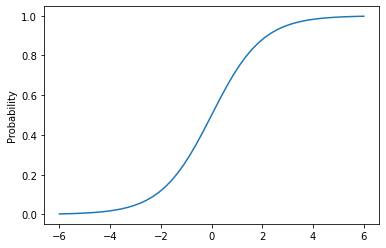

In [33]:
import numpy as np
import matplotlib.pyplot as plt
# Logit Function
def logit(x):
    return np.exp(x)  / (1 + np.exp(x)) 
    
x = np.linspace(-6,6,50, dtype=float)

y = logit(x)

plt.plot(x, y)
plt.ylabel("Probability")
plt.show()

In [40]:
df4.columns.tolist()

['index',
 'tourney_date',
 'tourney_name',
 'tourney_level',
 'best_of',
 'winner_id',
 'winner_name',
 'winner_rank',
 'loser_id',
 'loser_name',
 'loser_rank',
 'win',
 'F',
 'QF',
 'R128',
 'R16',
 'R32',
 'R64',
 'SF',
 'surface_Carpet',
 'surface_Clay',
 'surface_Grass',
 'surface_Hard',
 'D']

In [43]:
df4.head()

,index,tourney_date,tourney_name,tourney_level,best_of,winner_id,winner_name,winner_rank,loser_id,loser_name,...,R128,R16,R32,R64,SF,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,D
49,459,1970-01-01 00:00:00.020101011,Linz,I,3,201421,Ana Ivanovic,4.857981,201504,Julia Goerges,...,0,0,0,0,0,0,0,0,1,0.568284
248,3269,1970-01-01 00:00:00.020110718,Baku,I,3,201584,Ksenia Pervak,5.781360,201570,Vesna Dolonc,...,0,1,0,0,0,0,0,0,1,0.726435
336,334,1970-01-01 00:00:00.020101101,Tournament of Champions,F,3,200617,Kimiko Date Krumm,5.727920,201419,Na Li,...,0,0,0,0,0,0,0,0,1,2.268489
337,335,1970-01-01 00:00:00.020101101,Tournament of Champions,F,3,201421,Ana Ivanovic,4.584963,201499,Anastasia Pavlyuchenkova,...,0,0,0,0,0,0,0,0,1,0.263034
338,336,1970-01-01 00:00:00.020101101,Tournament of Champions,F,3,201290,Daniela Hantuchova,4.954196,201518,Yanina Wickmayer,...,0,0,0,0,0,0,0,0,1,0.494765


In [44]:
cols_to_keep = ['winner_rank','loser_rank', 'F', 'QF', 'R128', 'R16', 'R32', 'R64', 'SF', 'D', 'surface_Clay', 'surface_Clay', 'surface_Grass']
# Dropping NaN
X = df4[cols_to_keep].dropna()
X.head()

,winner_rank,loser_rank,F,QF,R128,R16,R32,R64,SF,D,surface_Clay,surface_Clay,surface_Grass
49,4.857981,5.426265,0,1,0,0,0,0,0,0.568284,0,0,0
248,5.781360,6.507795,0,0,0,1,0,0,0,0.726435,0,0,0
336,5.727920,3.459432,0,1,0,0,0,0,0,2.268489,0,0,0
337,4.584963,4.321928,0,1,0,0,0,0,0,0.263034,0,0,0
338,4.954196,4.459432,0,1,0,0,0,0,0,0.494765,0,0,0


In [45]:
# Separate the Features (X) from the Target (y)
y = df4["win"]

In [46]:
# Split our data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(19392, 13)

In [47]:
# Create a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

In [48]:
# Fit (train) or model using the training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [49]:
# Make predictions
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [50]:
# Print the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9996906419180202
